In [33]:
#nitsos
# Import required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
df_HBB = pd.read_excel("/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/k - mer encoding/HBB.xlsx")
df_HEXA = pd.read_excel("/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/k - mer encoding/HEXA.xlsx") 

# display(df_HBB, df_HEXA)

In [43]:
# concatenating df_HBB and df_HEXA vertical
vertical_concat = pd.concat([df_HEXA, df_HBB], axis=0)
vertical_concat = vertical_concat.drop('Unnamed: 0', axis=1)
#display(vertical_concat)


In [46]:
# Export to excel
vertical_concat.to_excel('dataset.xlsx')

In [103]:
df_dataset = pd.read_excel("/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/k - mer encoding/dataset.xlsx")
df_dataset = df_dataset.drop('Spacer sequence', axis=1)
df_dataset = df_dataset.drop('Unnamed: 0', axis=1)
df_dataset.rename(columns={"3' extension":"3extension"}, inplace=True)
df_dataset.rename(columns={"Mean of % correct edit (w/o indels) ":"Mean of correct edit"}, inplace=True)
#display(df_dataset)
print(df_dataset.shape)

(57, 5)


In [104]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
cv = CountVectorizer(ngram_range=(3,3), analyzer='char')
X = cv.fit_transform(df_dataset['3extension'])
# print(X)
# print(type(X))  # <class 'scipy.sparse.csr.csr_matrix'>
# print(X.shape)  # (57, 44)

In [105]:
feature = cv.get_feature_names_out()
# print(type(feature))      # <class 'numpy.ndarray'>
# print(len(feature))       # 44
# feature                   # print feature array

In [106]:
# Print the vocabulary
vocabulary = cv.vocabulary_
# print(type(vocabulary))   # <class 'dict'>
# print(len(vocabulary))    # 44
# display(vocabulary)

In [108]:
# Convert sparse csr matrix to dense format and allow columns to contain the array mapping from feature integer indices to feature names
count_vect_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
# print(type(count_vect_df))   # <class 'pandas.core.frame.DataFrame'>
# count_vect_df

In [109]:
# Concatenate the original dataframe and the count_vect_df columnwise
df_dataset = pd.concat([df_dataset, count_vect_df], axis=1)
display(df_dataset)         # 49 column  = 44 + pegRNA + 3extension + PBS + RT + Mean
print(df_dataset.shape)

,pegRNA,3extension,PBS length,RT template length,Mean of correct edit,aac,aag,acc,acg,act,...,tac,tat,tca,tcc,tct,tga,tgc,tgg,tta,ttc
0,HEXAs 1,ATATCTTATGGCCCTGACTGGAA,13,14,0.244361,0,0,0,0,1,...,0,2,0,0,1,1,0,2,1,0
1,HEXAs 2,TATATCTTATGGCCCTGACTGGAA,13,15,0.200436,0,0,0,0,1,...,0,3,0,0,1,1,0,2,1,0
2,HEXAs 3,GTATATCTTATGGCCCTGACTGGAA,13,16,0.974926,0,0,0,0,1,...,0,3,0,0,1,1,0,2,1,0
3,HEXAs 4,ACCGTATATCTTATGGCCCTGACTGGAA,13,19,3.501457,0,0,1,0,1,...,0,3,0,0,1,1,0,2,1,0
4,HEXAs 5,AACCGTATATCTTATGGCCCTGACTGGAA,13,20,5.617375,1,0,1,0,1,...,0,3,0,0,1,1,0,2,1,0
5,HEXAs 6,GAACCGTATATCTTATGGCCCTGACTGGAA,13,21,8.081667,1,0,1,0,1,...,0,3,0,0,1,1,0,2,1,0
6,HEXAs 7,TGAACCGTATATCTTATGGCCCTGACTGGAA,13,22,8.507569,1,0,1,0,1,...,0,3,0,0,1,2,0,2,1,0
7,HEXAs 8,ATATCTTATGGCCCTGACT,9,14,0.295150,0,0,0,0,1,...,0,2,0,0,1,1,0,1,1,0
8,HEXAs 9,TATATCTTATGGCCCTGACT,9,15,0.217884,0,0,0,0,1,...,0,3,0,0,1,1,0,1,1,0
9,HEXAs 10,GTATATCTTATGGCCCTGACT,9,16,2.557439,0,0,0,0,1,...,0,3,0,0,1,1,0,1,1,0


(57, 49)


In [111]:
# Target variable
y = df_dataset["Mean of correct edit"]

In [114]:
# Feature variables
# Drop the column that will be predicted and assign the features to variable
X = df_dataset.drop(['pegRNA', '3extension', 'Mean of correct edit'], axis = 1)
# X                 # 46 column
# print(X.shape)    # (57, 46)

<h4>Random Forest Regressor model<h4>

In [115]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

In [116]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [118]:
# print(X_train.shape) # (39, 46)
# print(X_test.shape)  # (18, 46)
# print(y_train.shape) # (39,)
# print(y_test.shape)  # (18,)

In [122]:
# Grid search the Random Forest Regressor
from sklearn.model_selection import GridSearchCV

# Setting the static parameters
rfr = RandomForestRegressor(bootstrap=True, random_state=42, n_jobs=7)

param_grid = dict(n_estimators=[10, 25, 50, 100, 1000],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rfr, param_grid, cv=10,
                    scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=7, random_state=42),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 25, 50, 100, 1000]},
             scoring='neg_mean_squared_error')

In [125]:
#find the grid parameters
print("grid.best_params_ {}".format(grid.best_params_))
print("grid.best_estimator_ {}".format(grid.best_estimator_)) 

grid.best_params_ {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 1000}
grid.best_estimator_ RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=7,
                      random_state=42)


In [128]:
# Instantiate model with grid search parameters
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,#max_depth=30
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=7, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [129]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=7,
                      random_state=42)

In [134]:
# Use the forest's predict method on the test data
predictions = rf.predict(X)
#print(type(predictions))           # <class 'numpy.ndarray'>
predictions_list = predictions.tolist()
#print(predictions_list)

In [142]:
# Place predictions in the dataframe
df_dataset['Mean of correct edit'] = df_dataset['Mean of correct edit']
df_dataset['Predictions'] = pd.DataFrame(data=predictions)

#print(df_dataset['Mean of correct edit'])
#print(type(df_dataset['Mean of correct edit']))          # <class 'pandas.core.series.Series'>

# Convert the series to a list
df_dataset_Mean_of_correct_edit_to_list = df_dataset['Mean of correct edit'].tolist()
#print(type(df5_Mean_of_correct_edit_to_list))        # <class 'list'>

In [143]:
results = df_dataset[['Mean of correct edit', 'Predictions']] 
#print(type(results))   #<class 'pandas.core.frame.DataFrame'>
#results

In [145]:
import xlrd 
import numpy as np
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
 
# set seed to make results reproducible
RF_SEED = 30

import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
 
from matplotlib.lines import Line2D
 
 
def simple_scatter_plot(x_data, y_data, output_filename, title_name, x_axis_label, y_axis_label):
    """Simple scatter plot. 
    Args:
    x_data (list): List with x-axis data.
    y_data (list): List with y-axis data.
    output_filename (str): Path to output image in PNG format.
    title_name (int): Plot title.
    x_axis_label (str): X-axis Label.
    y_axis_label (str): Y-axis Label.
    """
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
    matplotlib.title(title_name)
 
    ax = seaborn.scatterplot(x=x_data, y=y_data)
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
 
    matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)

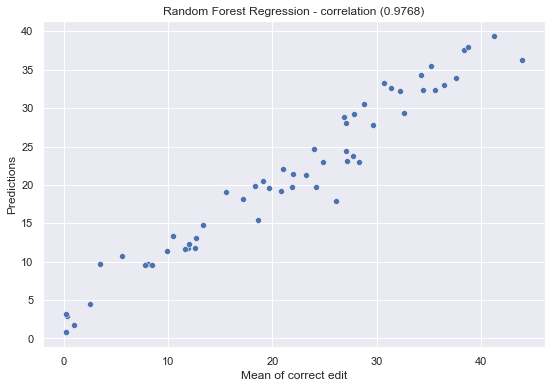

In [146]:
# find the correlation between real answer and prediction
#correlation = round(pearsonr(predictions, x_test_labels)[0], 5)
 
import matplotlib.pyplot as matplotlib    
x_test_labels = df_dataset_Mean_of_correct_edit_to_list
# find the correlation between real answer and prediction
correlation = round(pearsonr(predictions, x_test_labels)[0], 5)
#print("correlation = ", correlation)

output_filename = "rf_regression.png"
title_name = "Random Forest Regression - correlation ({})".format(correlation)
x_axis_label = "Mean of correct edit"
y_axis_label = "Predictions"

predictions = predictions_list 
 


# plot data
simple_scatter_plot(x_test_labels, predictions, output_filename, title_name, x_axis_label, y_axis_label)


In [148]:
# Print the actual values and the model's predictions
# results

In [149]:
import sklearn.metrics as metrics

# Calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(df_dataset['Mean of correct edit'],predictions))
print(metrics.mean_squared_error(df_dataset['Mean of correct edit'], predictions))
print(np.sqrt(metrics.mean_squared_error(df_dataset['Mean of correct edit'], predictions)))

2.126890039421075
7.729399653075721
2.7801797879050416
